In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

from scipy.stats import multivariate_normal
import math

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale


In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

X = X[:, [5, 6, 11]]

n = X.shape[0]
k = 3
q = X.shape[1]

In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection="3d")
colormap = np.array(["r", "g", "b"])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=colormap[answers])
ax.plot(M_mix[0][0], M_mix[0][1], M_mix[0][2], 'o', markersize = 16, color = 'r')
ax.plot(M_mix[1][0], M_mix[1][1], M_mix[1][2], 'o',  markersize = 16, color = 'g')
ax.plot(M_mix[2][0], M_mix[2][1], M_mix[2][2], 'o',  markersize = 16, color = 'b')
plt.title("Clusterisation")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection="3d")
colormap = np.array(["r", "g"])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=colormap[(answers == y) + 0])
plt.title("Correct answers")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

wine = load_wine()
X = wine.data
y = wine.target
X = X[:, [5, 6, 11]]

model = GMM(n_components=k, covariance_type="full")
model.fit(X)
answers = model.predict(X)

print(round(accuracy_score(y, answers), 3))

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, LeaveOneOut, StratifiedKFold


In [7]:
wine = load_wine()
X = wine.data
y = wine.target

X = X[:, [5, 6, 11]]

n = X.shape[0]
k = 3
q = X.shape[1]

In [18]:
kf = KFold(random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    knn.fit(X[train_index], y[train_index])
    answers = knn.predict(X[test_index])
    print(round(accuracy_score(y[test_index], answers), 3))


0.806
0.833
0.778
0.857
0.829


K neighbours	mean_score


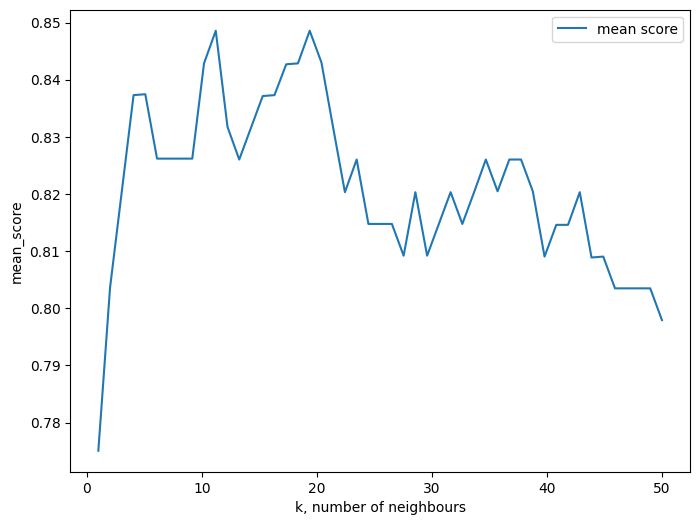

In [37]:
# K-fold
print("K neighbours", "mean_score", sep="\t")
score = list()
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    cur_score = list()
    for _, (train_index, test_index) in enumerate(kf.split(X)):
        knn.fit(X[train_index], y[train_index])
        answers = knn.predict(X[test_index])
        cur_score.append(accuracy_score(y[test_index], answers))
    score.append(np.average(cur_score))

plt.figure(figsize=(8, 6))
plt.plot(np.linspace(1, 50, 49), score, label='mean score')
plt.xlabel("k, number of neighbours")
plt.ylabel("mean_score")
plt.legend(loc="upper right")
# plt.set_size_inches(18.5, 10.5)
plt.show()